**Information about the dataset:**

**Title: Iris Plants Dataset**

**The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.**

**Predicted attribute: class of iris plant.**

**Attribute Information:**
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

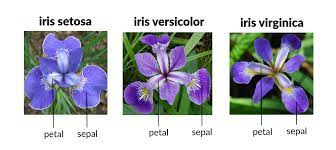

In [ ]:
from PIL import Image
img = Image.open("iris.png")
img

# Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data from csv file

In [ ]:
data = pd.read_csv("iris.csv")

In [ ]:
data.head(3)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
data.tail(3)

,sepal length,sepal width,petal length,petal width,class
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.size

750

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [ ]:
data.isnull().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

In [ ]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [ ]:
data.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

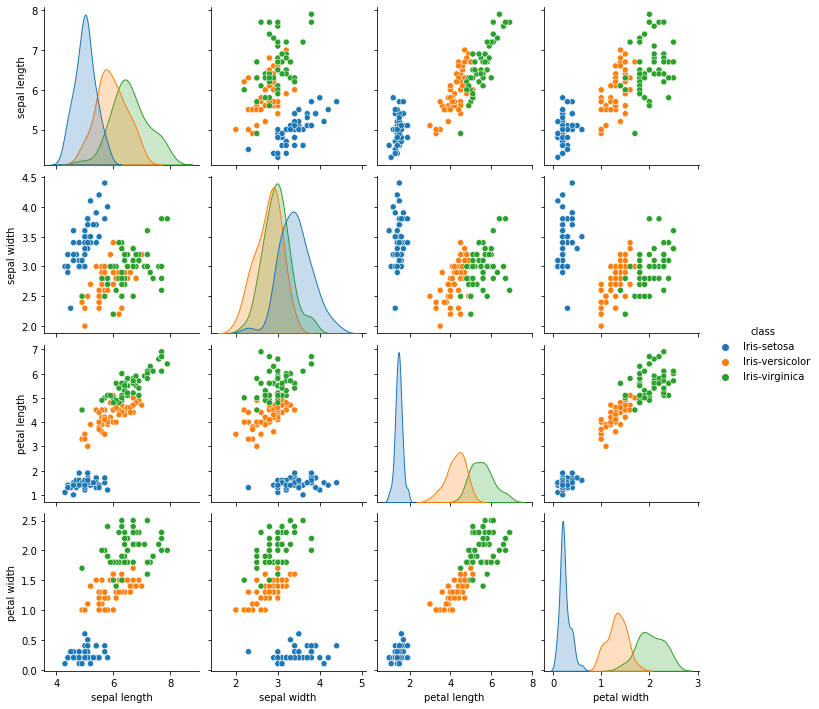

In [ ]:
sns.pairplot(data, hue="class");

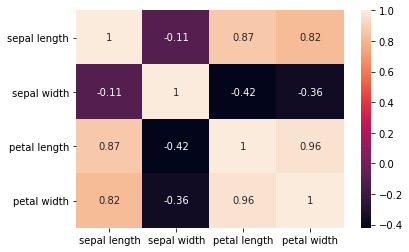

In [ ]:
sns.heatmap(data.corr(), annot=True);

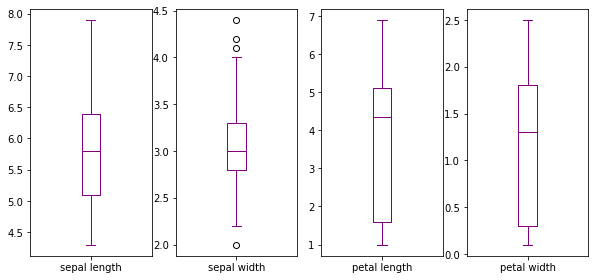

In [ ]:
data.plot(kind="box", subplots=True, layout=(2,4), figsize=(10,10), color="purple");

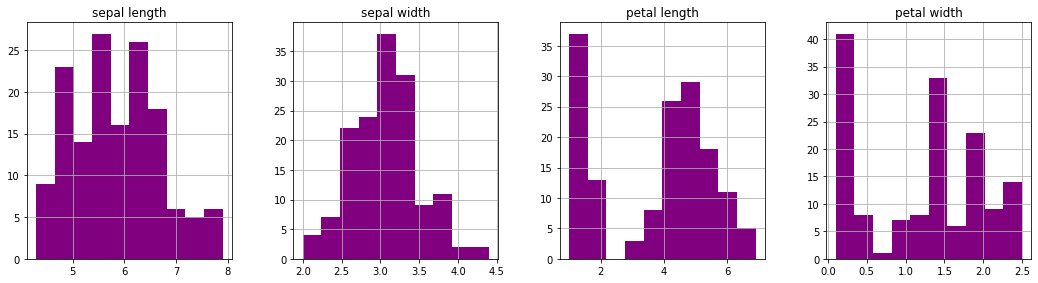

In [ ]:
data.hist(figsize=(18,10), layout=(2,4), color="purple");

# Feature Engineering

In [ ]:
data['class'] = data['class'].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})

In [ ]:
data['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [ ]:
X = data.drop(columns='class')
Y = data['class']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=2)
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame(Y_pred, Y_test)

In [ ]:
df.head()

,0
class,
0,0
2,2
2,2
1,1
2,2


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[20  0  1]
 [ 0 20  0]
 [ 0  0 19]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.9833333333333333


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame(Y_pred,Y_test)

In [ ]:
df.head()

,0
class,
0,0
2,2
2,2
1,1
2,2


In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[20  0  1]
 [ 0 20  0]
 [ 1  0 18]]


In [ ]:
print(accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame(Y_pred,Y_test)

In [ ]:
df.head()

,0
class,
0,0
2,2
2,2
1,1
2,2


In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[21  0  0]
 [ 0 20  0]
 [ 2  0 17]]


In [ ]:
print(accuracy_score(Y_test,Y_pred))

0.9666666666666667
